In [1]:
import os
print(f"Current working directory: {os.getcwd()}")
print(f"Files in current directory: {os.listdir('.')}")
!python ../models/GroundingDINO/ops/test.py

Current working directory: /data1/zhn/2022/Open-GroundingDino/examples
Files in current directory: ['Training_Script_example.ipynb', 'train.ipynb']
* True check_forward_equal_with_pytorch_double: max_abs_err 8.67e-19 max_rel_err 2.35e-16
* True check_forward_equal_with_pytorch_float: max_abs_err 4.66e-10 max_rel_err 1.13e-07
* True check_gradient_numerical(D=30)
* True check_gradient_numerical(D=32)
* True check_gradient_numerical(D=64)
* True check_gradient_numerical(D=71)


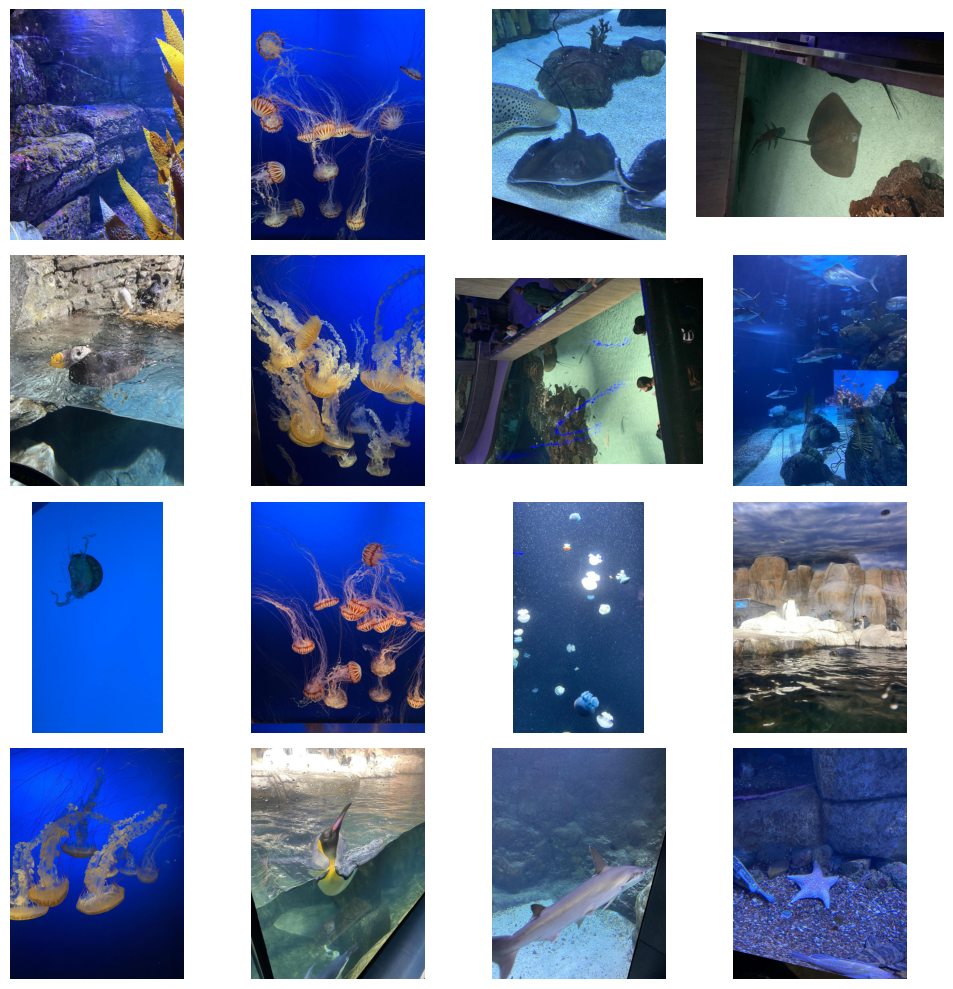

In [1]:
import matplotlib.pyplot as plt
import os
import random
from PIL import Image

# Path to the folder containing the images
folder_path = '../../dataset/aquarium_data/train'

# Get a list of all files in the folder
all_files = os.listdir(folder_path)

# Filter the list to include only files with image extensions
image_files = [file for file in all_files if file.lower().endswith(('png', 'jpg', 'jpeg', 'gif', 'bmp'))]

# Randomly select 16 images from the list
selected_images = random.sample(image_files, 16)

# Set up the plot grid
fig, axes = plt.subplots(4, 4, figsize=(10, 10))

# Plot each selected image in the grid
for ax, image_file in zip(axes.flatten(), selected_images):
    # Open the image file
    img = Image.open(os.path.join(folder_path, image_file))

    # Display the image on the grid
    ax.imshow(img)
    ax.axis('off')  # Hide the axes

# Adjust the layout to be tight
plt.tight_layout()

# Show the plot
plt.show()

In [2]:
import re

# Define the file path
file_path = '../tools/coco2odvg.py'

# Define the new values according to the dataset
new_id_map = '{0: 1, 1: 2, 2: 3, 3: 4, 4: 5, 5: 6, 6: 7}'# 7 classes of AquariumDataset
new_ori_map = '{"1": "fish", "2": "jellyfish", "3": "penguins", "4": "sharks", "5": "puffins", "6":"stingrays", "7": "starfish"}'

# Read the content of the file
with open(file_path, 'r') as file:
    content = file.read()

# Replace the id_map value using regex
content = re.sub(r'id_map\s*=\s*\{[^\}]*\}', f'id_map = {new_id_map}', content)

# Replace the ori_map value using regex
content = re.sub(r'ori_map\s*=\s*\{[^\}]*\}', f'ori_map = {new_ori_map}', content)

# Write the updated content back to the file
with open(file_path, 'w') as file:
    file.write(content)

print(f"Updated {file_path} successfully.")

Updated ../tools/coco2odvg.py successfully.


In [3]:
!python ../tools/coco2odvg.py --input "../../dataset/aquarium_data/train/_annotations.coco.json"  --output "../../dataset/aquarium_data//train.jsonl"

loading annotations into memory...
Done (t=0.09s)
creating index...
index created!
100%|██████████████████████████████████████| 448/448 [00:00<00:00, 34694.39it/s]
  == dump meta ...
  == done.


In [4]:
import json

# Define the content for the JSON file
content = {
    "0": "fish",
    "1": "jellyfish",
    "2": "penguins",
    "3": "sharks",
    "4": "puffins",
    "5": "stingrays",
    "6": "starfish",
}

# Define the file path
file_path = '../../dataset/aquarium_data/label.json'

# Write the content to the JSON file
with open(file_path, 'w') as file:
    json.dump(content, file)

print(f"File '{file_path}' created successfully.")

File '../../dataset/aquarium_data/label.json' created successfully.


In [ ]:
#change the paths according to file locations
import json

# Define the data
data = {
    "train": [
        {
            "root": "/data1/zhn/2022/dataset/aquarium_data/train",#Train images
            "anno": "/data1/zhn/2022/dataset/aquarium_data/train.jsonl",#Odvg jsonl file
            "label_map": "/data1/zhn/2022/dataset/aquarium_data/label.json",# label.json file
            "dataset_mode": "odvg"
        }
    ],
    "val": [
        {
            "root": "/data1/zhn/2022/dataset/aquarium_data/test",#Test Images
            "anno": "/data1/zhn/2022/dataset/aquarium_data/test/_annotations.coco.json",#Test data Annotation file in COCO
            "label_map": None,
            "dataset_mode": "coco"
        }
    ]
}

file_path = '../config/datasets_mixed_odvg.json'

with open(file_path, 'w') as file:
    json.dump(data, file, indent=2)

print(f"Data has been written to {file_path}")

In [6]:
import re

def modify_file(file_path):
    label_list_content = 'label_list = ["fish","jellyfish","penguins","sharks","puffins","stingrays","starfish"]\n'

    # Read the entire content of the file
    with open(file_path, 'r') as file:
        content = file.read()

    # Replace use_coco_eval =TRUE with use_coco_eval =FALSE using regex
    content = re.sub(r'use_coco_eval\s*=\s*True', 'use_coco_eval = False', content)

    # Insert label_list after use_coco_eval = FALSE using regex
    content = re.sub(r'use_coco_eval\s*=\s*False', r'use_coco_eval = False\n\n' + label_list_content, content, count=1, flags=re.MULTILINE)

    # Write the modified content back to the file
    with open(file_path, 'w') as file:
        file.write(content)

# Paths to the files
cfg_coco_path = '../config/cfg_coco.py'
cfg_odvg_path = '../config/cfg_odvg.py'

# Modify both files
modify_file(cfg_coco_path)
modify_file(cfg_odvg_path)

print("Updated use_coco_eval to FALSE and added label_list using regex in both files.")

Updated use_coco_eval to FALSE and added label_list using regex in both files.


In [7]:
!wget https://github.com/IDEA-Research/GroundingDINO/releases/download/v0.1.0-alpha/groundingdino_swint_ogc.pth

In [10]:
from transformers import AutoTokenizer, AutoModel

bert_path = "../../bert-base-uncased"
# Initialize tokenizer and model
tokenizer = AutoTokenizer.from_pretrained(bert_path)
model = AutoModel.from_pretrained(bert_path)

In [11]:
%cd ../bert
print(tokenizer.save_pretrained("."))
print(model.save_pretrained("."))

/data1/zhn/2022/Open-GroundingDino/bert
('./tokenizer_config.json', './special_tokens_map.json', './vocab.txt', './added_tokens.json', './tokenizer.json')
None


In [12]:
def replace_file_content(file_path, new_content):
    try:
        # Open the file in write mode and replace its content
        with open(file_path, 'w') as file:
            file.write(new_content)
        print(f"Successfully replaced the content of {file_path}")
    except IOError as e:
        print(f"Error occurred while replacing content: {e}")

# Define the new content for the file
new_content = """\
CFG=$1
DATASETS=$2
OUTPUT_DIR=$3

# Set the environment variable for CUDA
export CUDA_VISIBLE_DEVICES=0

python main.py \\
    --config_file ${CFG} \\
    --datasets ${DATASETS} \\
    --output_dir ${OUTPUT_DIR} \\
    --pretrain_model_path ../groundingdino_swint_ogc.pth \\
    --options text_encoder_type="../bert"
"""

# Specify the file path
file_path = '../train_dist.sh'

# Call the function to replace the content
replace_file_content(file_path, new_content)

Successfully replaced the content of ../train_dist.sh
